In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

import windIO
import wind
import windCAD
import foam

## Basic definitions

In [99]:
dir_wtVl_tngE2 = r"D:/tempData_depot/simData_CandC/wt_tngE2/"
dir_wtVl_tngE3 = r"D:/tempData_depot/simData_CandC/wt_tngE3/"
dir_wtCp_tngE2 = r"E:/TNG/rawHFPI/tngE2p1/"
dir_wtCp_tngE3 = r"E:/TNG/rawHFPI/tngE3p1/"

dir_lesE2_00 = r"D:/tempData_depot/simData_CandC/ttuE010_000.0/"
dir_lesE2_45 = r"D:/tempData_depot/simData_CandC/ttuE010_450.2/"
dir_lesE2_90 = r"D:/tempData_depot/simData_CandC/ttuE010_900.1/"
dir_lesE3_00 = r"D:/tempData_depot/simData_CandC/ttuE087_000.0/"
dir_lesE3_45 = r"D:/tempData_depot/simData_CandC/ttuE087_450.2/"
dir_lesE3_90 = r"D:/tempData_depot/simData_CandC/ttuE087_900.0/"

saveFigs = True
figDir = r"D:/tempData_depot/simData_CandC/__plots/"

In [70]:
H = 0.08
B = 0.2744
D = 0.183
lScl=0.02

## Building Geometry

In [ ]:
tapFile = r"D:/tempData_depot/simData_CandC/tngTapDefinition.csv"
data = pd.read_csv(tapFile)

faceID = [1,2,3,4,5,6]
name = ['Roof_1','Roof_2','Wall_1','Wall_2','Wall_3','Wall_4']
note = ['','','','','','']
origin = [[0,0,0.08],
          [0,-0.0915,0.07809375],
          [-0.1372,0,0],
          [0,-0.0915,0],
          [0.1372,0,0],
          [0,0.0915,0],]
basisVectors = [[[1,0,0],[0,0.999783057,0.020828814],[0,-0.020828814,0.999783057]],
                [[1,0,0],[0,0.999783057,-0.020828814],[0,0.020828814,0.999783057]],
                [[0,0,-1],[-1,0,0],[0,1,0]],
                [[1,0,0],[0,0,-1],[0,1,0]],
                [[0,0,1],[1,0,0],[0,1,0]],
                [[-1,0,0],[0,0,1],[0,1,0]],]
# origin_plt = [[0, 0],
#                 [0, -0.091519855],
#                 [0, -0.2332],
#                 [0, -0.18559375],
#                 [0, -0.2332],
#                 [0, -0.18559375],]
origin_plt = [[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              ]
# basisVectors_plt = [[[0, -1], [1, 0]],
#                     [[0, -1],[1, 0]],
#                     [[1, 0], [0, 1]],
#                     [[0, -1], [1, 0]],
#                     [[-1, 0], [0, -1]],
#                     [[0, 1], [-1, 0]],]
# basisVectors_plt = [[[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     ]
basisVectors_plt = [[[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    ]
vertices = [[[-0.091519855,-0.1372],[0,-0.1372],[0,0.1372],[-0.091519855,0.1372],[-0.091519855,-0.1372]],
            [[0,-0.1372],[0.091519855,-0.1372],[0.091519855,0.1372],[0,0.1372],[0,-0.1372]],
            [[-0.0915,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0,-0.1532],[-0.0915,-0.15510625],[-0.0915,-0.2332]],
            [[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,-0.1372]],
            [[-0.0915,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0,0.1532],[-0.0915,0.15510625],[-0.0915,0.2332]],
            [[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,-0.1372]],]



In [ ]:
# Zone Dict definitions

zoneDict = [
        {    # Face 1
            0:['NBCC', 'Zone c', np.array([[-0.091519855,-0.1372],[-0.071519855,-0.1372],[-0.071519855,-0.1172],[-0.091519855,-0.1172],[-0.091519855,-0.1372]])],
            1:['NBCC', 'Zone c', np.array([[-0.091519855,0.1172],[-0.071519855,0.1172],[-0.071519855,0.1372],[-0.091519855,0.1372],[-0.091519855,0.1172]])],
            2:['NBCC', 'Zone s', np.array([[-0.071519855,-0.1372],[0,-0.1372],[0,-0.1172],[-0.071519855,-0.1172],[-0.071519855,-0.1372]])],
            3:['NBCC', 'Zone s', np.array([[-0.091519855,-0.1172],[-0.071519855,-0.1172],[-0.071519855,0.1172],[-0.091519855,0.1172],[-0.091519855,-0.1172]])],
            4:['NBCC', 'Zone s', np.array([[-0.071519855,0.1172],[0,0.1172],[0,0.1372],[-0.071519855,0.1372],[-0.071519855,0.1172]])],
            5:['NBCC', 'Zone r', np.array([[-0.071519855,-0.1172],[0,-0.1172],[0,0.1172],[-0.071519855,0.1172],[-0.071519855,-0.1172]])],
        },
        {   # Face 2
            0:['NBCC', 'Zone c', np.array([[0.091519855,-0.1372],[0.071519855,-0.1372],[0.071519855,-0.1172],[0.091519855,-0.1172],[0.091519855,-0.1372]])],
            1:['NBCC', 'Zone c', np.array([[0.091519855,0.1172],[0.071519855,0.1172],[0.071519855,0.1372],[0.091519855,0.1372],[0.091519855,0.1172]])],
            2:['NBCC', 'Zone s', np.array([[0.071519855,-0.1372],[0,-0.1372],[0,-0.1172],[0.071519855,-0.1172],[0.071519855,-0.1372]])],
            3:['NBCC', 'Zone s', np.array([[0.091519855,-0.1172],[0.071519855,-0.1172],[0.071519855,0.1172],[0.091519855,0.1172],[0.091519855,-0.1172]])],
            4:['NBCC', 'Zone s', np.array([[0.071519855,0.1172],[0,0.1172],[0,0.1372],[0.071519855,0.1372],[0.071519855,0.1172]])],
            5:['NBCC', 'Zone r', np.array([[0.071519855,-0.1172],[0,-0.1172],[0,0.1172],[0.071519855,0.1172],[0.071519855,-0.1172]])],
        },
        {   # Face 3
            0:['NBCC', 'Zone e', np.array([[-0.0915,-0.2332],[-0.0715,-0.2332],[-0.0715,-0.154689583],[-0.0915,-0.15510625],[-0.0915,-0.2332]])],
            1:['NBCC', 'Zone e', np.array([[0.0715,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0.0715,-0.154689583],[0.0715,-0.2332]])],
            2:['NBCC', 'Zone w', np.array([[-0.0715,-0.2332],[0.0715,-0.2332],[0.0715,-0.154689583],[0,-0.1532],[-0.0715,-0.154689583],[-0.0715,-0.2332]])],
        },
        {   # Face 4
            0:['NBCC', 'Zone e', np.array([[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,-0.1172],[0.107519855,-0.1172],[0.107519855,-0.1372]])],
            1:['NBCC', 'Zone e', np.array([[0.107519855,0.1172],[0.185613605,0.1172],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,0.1172]])],
            2:['NBCC', 'Zone w', np.array([[0.107519855,-0.1172],[0.185613605,-0.1172],[0.185613605,0.1172],[0.107519855,0.1172],[0.107519855,-0.1172]])],
        },
        {   # Face 5
            0:['NBCC', 'Zone e', np.array([[-0.0915,0.2332],[-0.0715,0.2332],[-0.0715,0.154689583],[-0.0915,0.15510625],[-0.0915,0.2332]])],
            1:['NBCC', 'Zone e', np.array([[0.0715,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0.0715,0.154689583],[0.0715,0.2332]])],
            2:['NBCC', 'Zone w', np.array([[-0.0715,0.2332],[0.0715,0.2332],[0.0715,0.154689583],[0,0.1532],[-0.0715,0.154689583],[-0.0715,0.2332]])],
        },
        {   # Face 6
            0:['NBCC', 'Zone e', np.array([[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,-0.1172],[-0.107519855,-0.1172],[-0.107519855,-0.1372]])],
            1:['NBCC', 'Zone e', np.array([[-0.107519855,0.1172],[-0.185613605,0.1172],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,0.1172]])],
            2:['NBCC', 'Zone w', np.array([[-0.107519855,-0.1172],[-0.185613605,-0.1172],[-0.185613605,0.1172],[-0.107519855,0.1172],[-0.107519855,-0.1172]])],
        },
]

# file = caseDir+'NBCC_zoneDict.json'
# with open(file, 'w') as f:
#     json.dump(zoneDict,f, indent=4, separators=(',', ':'))

In [ ]:
faces = []
for i,f in enumerate(faceID):
    idx = data.index[data.faceID == f]
    tapCoords = np.transpose(np.array([data.x[idx], data.y[idx]]))
    tapNos = np.array(data.tapNo[idx],dtype=int)
    idxOrig = idx

    fc = windCAD.face(
                name=name[i],
                ID=f,
                origin=origin[i],
                basisVectors=basisVectors[i],
                origin_plt=origin_plt[i],
                basisVectors_plt=basisVectors_plt[i],
                vertices=vertices[i],
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=None,
                tapCoord=tapCoords,
                zoneDict=zoneDict[i],
                # nominalPanelAreas=[1.0e-4, 2.45e-4, 4.8e-4, 7.1e-4, 1e-3], #[5e-5, 8e-5, 1.5e-4, 5e-4],
                nominalPanelAreas=[4.4e-5, 8.15e-5, 1.3e-4, 5e-4, 6.8e-4, 1.3e-3,],   # Final! All are tested. 1.3e-3 results in blunt edge zones in the walls but no error.
                # nominalPanelAreas=[1.3e-3,], 
                # nominalPanelAreas=[4.8e-4, 7.2e-4, 1e-3],
                numOfNominalPanelAreas=3,
                )
    # fc.plot(figSize=[20,15], overlayPanels=True, overlayTaps=True, overlayTribs=True, overlayZones=True)
    faces.append(fc)

# file = caseDir+'ttu_bldgGeom.json'
# allFaces.writeToFile(file_basic=file)

In [ ]:
bldg = wind.bldgCp(bldgName='TTU',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='TNG-E2R1',
                )
print(bldg.error_in_panels)
print(bldg.error_in_zones)

In [ ]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot()

ttu.plotEdges(ax=ax)
ttu.plotZones(ax=ax)
ttu.plotTaps(ax=ax)
ttu.plotPanels(ax=ax,aIdx=5)

ax.axis('equal')
ax.axis('off')



## Wind field

### Read data

In [55]:
dt_cobraProbe = 3.7890e-04

temp = pd.read_csv(dir_wtVl_tngE2+"profiles.csv")
U_TH = np.load(dir_wtVl_tngE2+"UofT.npy")
V_TH = np.load(dir_wtVl_tngE2+"VofT.npy")
W_TH = np.load(dir_wtVl_tngE2+"WofT.npy")
wtVel_E2 = wind.profile(name="BLWT(z_0=0.01m)", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt_cobraProbe,nSpectAvg=64)

temp = pd.read_csv(dir_wtVl_tngE3+"profiles.csv")
U_TH = np.load(dir_wtVl_tngE3+"UofT.npy")
V_TH = np.load(dir_wtVl_tngE3+"VofT.npy")
W_TH = np.load(dir_wtVl_tngE3+"WofT.npy")
wtVel_E3 = wind.profile(name="BLWT(z_0=0.087m)", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt_cobraProbe,nSpectAvg=64)

U_TH = V_TH = W_TH = None

In [ ]:
lesVel_E2 = foam.processVelProfile(caseDir=dir_lesE2_00, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])
lesVel_E2.name = "LES(z_0=0.01m)"

lesVel_E3 = foam.processVelProfile(caseDir=dir_lesE3_00, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])
lesVel_E3.name = "LES(z_0=0.087m)"


In [71]:
vel = wind.Profiles([wtVel_E2, lesVel_E2, wtVel_E3, lesVel_E3])
esdu74_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=lesVel_E2.Z/lScl)
esdu74_E3 = wind.ESDU74(z0=0.087, Zref=H/lScl, Uref=25.0, Z=lesVel_E2.Z/lScl)
esdu85_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=lesVel_E3.Z/lScl)
esdu85_E3 = wind.ESDU74(z0=0.087, Zref=H/lScl, Uref=25.0, Z=lesVel_E3.Z/lScl)

### Plots

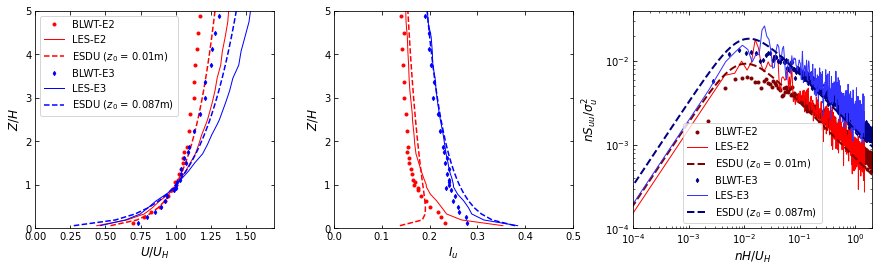

In [173]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

def typicalEdits(ax):
    ax.tick_params(axis='both',direction='in',which='both',top=True,right=True)
    
fig = plt.figure(figsize=[15,4])
fig.subplots_adjust(wspace=0.25)

ax = plt.subplot(1,3,1)
ax.plot(wtVel_E2.UbyUh(), wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.UbyUh(), lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.U()/esdu74_E2.Uref, esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.UbyUh(), wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.UbyUh(), lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.U()/esdu74_E3.Uref, esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_ylim([0,5])
ax.set_xlim([0,1.7])
ax.set_xlabel(r'$U/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)


ax = plt.subplot(1,3,2)
ax.plot(wtVel_E2.Iu, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iu, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iu(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iu, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iu, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iu(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_ylim([0,5])
ax.set_xlim([0,0.5])
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.set_xlabel(r'$I_u$',fontsize=fntSz)
typicalEdits(ax)

# ax.yaxis.set_ticklabels([])


ax = plt.subplot(1,3,3)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSuu(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSuu(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSuu()[0], esdu74_E2.rSuu()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSuu(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSuu(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSuu()[0], esdu74_E3.rSuu()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([1e-4,2e0])
ax.set_ylim([1e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{uu}/\sigma_u^2$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)


# ax = plt.subplot(1,4,3)
# ax.plot(wtVel_E2.Iv, wtVel_E2.ZbyH(), label='BLWT-E2', 
#         color=colE2, linestyle='none', marker=mrkE2, ms=3)
# ax.plot(lesVel_E2.Iv, lesVel_E2.ZbyH(), label='LES-E2', 
#         color=colE2, linestyle='-', lw=1.0)
# ax.plot(esdu74_E2.Iv(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
#         color=colE2, linestyle='--', lw=1.5)

# ax.plot(wtVel_E3.Iv, wtVel_E3.ZbyH(), label='BLWT-E3', 
#         color=colE3, linestyle='none', marker=mrkE3, ms=3)
# ax.plot(lesVel_E3.Iv, lesVel_E3.ZbyH(), label='LES-E3', 
#         color=colE3, linestyle='-', lw=1.0)
# ax.plot(esdu74_E3.Iv(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
#         color=colE3, linestyle='--', lw=1.5)
# ax.set_ylim([0,5])
# ax.set_xlim([0,0.5])
# ax.set_xlabel(r'$I_v$',fontsize=fntSz)
# typicalEdits(ax)
# ax.yaxis.set_ticklabels([])


# ax = plt.subplot(1,4,4)
# ax.plot(wtVel_E2.Iw, wtVel_E2.ZbyH(), label='BLWT-E2', 
#         color=colE2, linestyle='none', marker=mrkE2, ms=3)
# ax.plot(lesVel_E2.Iw, lesVel_E2.ZbyH(), label='LES-E2', 
#         color=colE2, linestyle='-', lw=1.0)
# ax.plot(esdu74_E2.Iw(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
#         color=colE2, linestyle='--', lw=1.5)

# ax.plot(wtVel_E3.Iw, wtVel_E3.ZbyH(), label='BLWT-E3', 
#         color=colE3, linestyle='none', marker=mrkE3, ms=3)
# ax.plot(lesVel_E3.Iw, lesVel_E3.ZbyH(), label='LES-E3', 
#         color=colE3, linestyle='-', lw=1.0)
# ax.plot(esdu74_E3.Iw(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
#         color=colE3, linestyle='--', lw=1.5)
# ax.set_ylim([0,5])
# ax.set_xlim([0.01,0.5])
# ax.set_xlabel(r'$I_w$',fontsize=fntSz)
# typicalEdits(ax)
# ax.yaxis.set_ticklabels([])
# ax.legend()

plt.show()

if saveFigs:
    fig.savefig(figDir+"profAndSpect.svg",format='svg',dpi=1200, bbox_inches='tight')

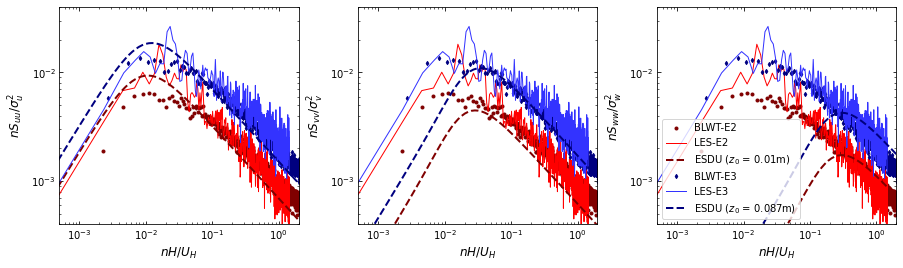

In [161]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

    
fig = plt.figure(figsize=[15,4])

fig.subplots_adjust(wspace=0.25)

ax = plt.subplot(1,3,1)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSuu(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSuu(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSuu()[0], esdu74_E2.rSuu()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSuu(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSuu(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSuu()[0], esdu74_E3.rSuu()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{uu}/\sigma_u^2$',fontsize=fntSz)
typicalEdits(ax)



ax = plt.subplot(1,3,2)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSvv(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSvv(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSvv()[0], esdu74_E2.rSvv()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSvv(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSvv(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSvv()[0], esdu74_E3.rSvv()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{vv}/\sigma_v^2$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,3,3)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSww(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSww(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSww()[0], esdu74_E2.rSww()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSww(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSww(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSww()[0], esdu74_E3.rSww()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{ww}/\sigma_w^2$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)

plt.show()

if saveFigs:
    fig.savefig(figDir+"spectra.svg",format='svg',dpi=1200, bbox_inches='tight')

## BLWT $C_p$ data

In [ ]:
mainRefPitotChnlIdx = 2
fps2mps = 0.3048
Zpitot = 1.48
Ntaps = 456

dataDirHFPI = r'E:\TNG\rawHFPI\tngE2p1/'

N_AoA = 3
# AoAids = [str(i).zfill(3) for i in range(1,N_AoA+1)]
AoAids = ['001', '010', '019']

AoA = np.zeros((N_AoA))
sampleRate = np.zeros((N_AoA))

for i,a in enumerate(AoAids):
    file_pssd = dataDirHFPI+'TNGp1E02R001P'+ AoAids[i] +'a.pssd'
    file_pssr = dataDirHFPI+'TNGp1E02R001P'+ AoAids[i] +'a.pssr'

    cp_data,analog,WTTDATALOG = windIO.readPSSfile(file_pssr,file_pssd)

    if i == 0:
        N_t = np.shape(cp_data)[0]
        CpTH = np.zeros((N_AoA,Ntaps,N_t)) # [N_AoA,Ntaps,Ntime]
        UpitotOfT = np.zeros((N_AoA,N_t))
    CpTH[i,:,:] = np.transpose(cp_data[:,0:Ntaps])
    UpitotOfT[i,:] = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
    AoA[i] = np.round(WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0],1)
    sampleRate[i] = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
Upitot = np.mean(UpitotOfT,axis=1)



In [ ]:
ttu = wind.bldgCp(bldgName='TTU',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=0.02,
                caseName='TNG-E2R1',
                refProfile=vel,
                Zref_input=Zpitot,  # for the Cp TH being input below
                Uref_input=Upitot,  # for the Cp TH being input below
                samplingFreq=sampleRate[0],
                airDensity=1.125,
                AoA=AoA,
                CpOfT=CpTH,  # Cp TH referenced to Uref at Zref
                badTaps=None, # tap numbers to remove
                reReferenceCpToH=True, # whether or not to re-reference Cp building height
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakMethod='minmax',
                )


In [ ]:
fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot()
ttu.plotZones(ax=ax)
ax.axis('equal')

In [ ]:
f = 1
fc = ttu[f]
a = 3
d = 1
fldRange=[-2,1]

fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot()
ttu.plotPanelCpStatContour(fieldName='mean',dxnIdx=d,aIdx=a,showValueText=False,ax=ax,fldRange=fldRange)
ttu.plotPanels(ax=ax,aIdx=a)
ttu.plotEdges(ax=ax,showName=False)
ttu.plotZones(ax=ax)
# ttu.plotTaps(ax=ax,showTapNo=True,fontsize=10)
# ttu.plotTribs(ax=ax)
ax.axis('equal')


In [ ]:
# fld = 'mean'
# # print(ttu.error_in_panels)
# # print(ttu.error_in_zones)
# for i in range(5):
#     print(f"A: {np.shape(ttu.panelAreas[i][2])}, \tGCp:{np.shape(ttu.CpStatsAreaAvgByZone[i][2]['mean'])}")
# for f,fc in enumerate(ttu):
#     for z,zone in enumerate(fc.zoneDict):
#         for a, area in enumerate(fc.nominalPanelAreas):
#             print(f"Zone: {fc.zoneDict[zone][0:2]}\tAreaIdx:{a}\tNo. panels: {len(fc.panels[z][a].geoms)}\tPanel areas: {len(fc.panelAreas[z][a])}\t Weights: {len(fc.tapWghtPerPanel[z][a])} \tCpAvg.: {np.shape(ttu.CpStatsAreaAvg[f][z][a][fld])}")
#             if not len(fc.panelAreas[z][a]) == np.shape(ttu.CpStatsAreaAvg[f][z][a][fld])[1]:
#                 print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

In [ ]:

# for z in ttu.panelAreas:
#     print(ttu.panelAreas[z][0:2])

#     plt.figure()
#     plt.semilogx(ttu.panelAreas[z][2], ttu.CpStatsAreaAvgByZone[z][2]['peakMin'][0,:],'.k')
#     plt.show()

# LES

In [ ]:
lesCase = r'D:\tempData_depot\simData_CandC\ttuE087_900.0/'

## Wind field

In [ ]:

lesProf = foam.processVelProfile(caseDir=lesCase, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])



In [ ]:
p0Idx = 30
_, _, p0OfT = foam.readProbe(probeName='probes.V0', postProcDir=lesCase+'postProcessing/', field='p', trimTimeSegs=[[0,1.0]],)

pOfTfile = lesCase+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT = np.load(pOfTfile)
m,n = np.shape(pOfT)
pOfT = np.reshape(pOfT,(1,m,n))
print(np.shape(pOfT))

p0OfT = np.reshape(np.transpose(p0OfT)[p0Idx,:n],(1,-1))
print(np.shape(p0OfT))


In [ ]:



ttuLES = wind.bldgCp(bldgName='TTU',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=0.02,
                caseName='LES-E087-90deg',
                refProfile=lesProf,
                Zref_input=H,  # for the Cp TH being input below
                Uref_input=lesProf.Uh,  # for the Cp TH being input below
                samplingFreq=lesProf.samplingFreq,
                airDensity=1.125,
                AoA=[90.0,],
                # CpOfT=CpTH,  # Cp TH referenced to Uref at Zref
                # badTaps=None, # tap numbers to remove
                # reReferenceCpToH=True, # whether or not to re-reference Cp building height
                pOfT=pOfT,
                p0ofT=p0OfT,
                # CpStats=None,
                peakMethod='minmax',
                )

In [ ]:
f = 1
fc = ttu[f]
a = 3
d = 2
fldRange=[-2,1]

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot()
ttu.plotPanelCpStatContour(fieldName='mean',dxnIdx=d,aIdx=a,showValueText=False,ax=ax,fldRange=fldRange)
# ttu.plotPanels(ax=ax,aIdx=a)
# ttu.plotTapField(ax=ax,field='mean')
ttu.plotEdges(ax=ax,showName=False)
ttu.plotZones(ax=ax)
# ttu.plotTaps(ax=ax,showTapNo=True,fontsize=10)
# ttu.plotTribs(ax=ax)
ax.set_title('BLWT')
ax.axis('equal')

d = 0
fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot()
ttuLES.plotPanelCpStatContour(fieldName='mean',dxnIdx=d,aIdx=a,showValueText=False,ax=ax,fldRange=fldRange)
# ttuLES.plotPanels(ax=ax,aIdx=a)
# ttuLES.plotTapField(ax=ax,field='mean')
ttuLES.plotEdges(ax=ax,showName=False)
ttuLES.plotZones(ax=ax)
# ttuLES.plotTaps(ax=ax,showTapNo=True,fontsize=10)
# ttuLES.plotTribs(ax=ax)
ax.set_title('LES')
ax.axis('equal')

In [ ]:
print((ttu.CpStats['std']))

# CAD lab

In [ ]:
import shapely.geometry as shp
from shapely.ops import voronoi_diagram
from shapely.validation import make_valid
from typing import List, Tuple, Dict

from scipy.spatial import Voronoi, voronoi_plot_2d

def meshRegionWithPanels(region,area,minAreaFactor=0.5,debugMode=False) -> Tuple[shp.MultiPolygon, List[float]]:
    if debugMode:
        print(f"Region: shape {region.shape}, {region}\n")
        print(f"NominalArea = {area}")

    d = np.sqrt(area)
    # generate a uniform grid of panel center points covering the extents of the region
    xMin, xMax = min(region[:,0]), max(region[:,0])
    yMin, yMax = min(region[:,1]), max(region[:,1])
    Dx = xMax-xMin
    Dy = yMax-yMin
    N = int(np.ceil(Dx/d))  # max(int(np.round(Dx/d,0)), 1)
    dx = Dx/N
    M = int(np.ceil(Dy/d))
    dy = Dy/M

    x = np.linspace(xMin+dx/2,xMax-dx/2,N) # np.linspace(xMin+dx/2,xMax-dx/2,N-1) if N > 2 else (xMax-xMin)/2.0
    y = np.linspace(yMin+dy/2,yMax-dy/2,M) # if M > 2 else (yMax-yMin)/2.0
    # x = np.mean([xMin,xMax]) if N == 1 else np.linspace(xMin+dx/2,xMax-dx/2,N) 
    # y = np.mean([yMin,yMax]) if M == 1 else np.linspace(yMin+dy/2,yMax-dy/2,M) 
    X,Y = np.meshgrid(x,y)
    XY = np.concatenate((np.reshape(X,[-1,1]), np.reshape(Y,[-1,1])),axis=1)
    isSinglePoint = len(X) == 1 and len(Y) == 1

    if debugMode:
        print(f"x Range: {xMin} to {xMax} \t\t y Range: {yMin} to {yMax}")
        print(f"dx = {dx}, dy = {dy}")
        print(f"Point grid: {N} X {M}")
        print(f"Grid \t\tx: {x}\n\t\ty: {y} ")
        print(f"Grid mesh shape: {np.shape(X)}")

    # generate the panels with the regular points. Take a note of the panels with area less than minAreaFactor*targetPanelArea for merging
    points1 = shp.MultiPoint(XY)
    regions1 = voronoi_diagram(points1)
    bound = shp.Polygon(region)

    if debugMode:
        print(f"Generated bulk voronoi polygons: {len(regions1.geoms)}")
        plt.figure(figsize=[15,10])
        x,y = bound.exterior.xy
        plt.plot(x,y,'-b',lw=3)
        # plt.plot(X,Y,'.r')
        plt.axis('equal')

    panels1 = []
    goodPts = []
    for g in regions1.geoms:
        newRig = windCAD.getIntersection(bound,g)
        if newRig is not None:
            panels1.append(newRig)
        else:
            continue
        if newRig.area > minAreaFactor*area:
            center = newRig.centroid
            goodPts.append(center.xy)
        if debugMode:
            x,y = newRig.exterior.xy
            # plt.fill(x,y,'y',alpha=0.1)
            # plt.plot(x,y,'-b',alpha=1,lw=0.5)
    goodPts = np.reshape(np.asarray(goodPts,dtype=float),[-1,2])
    if debugMode:
        print(f"Original grid points: {len(panels1)}")
        print(f"Picked good grid points: {len(goodPts)}")
        
    # regenerate the panels without those that had areas less than minAreaFactor*targetPanelArea
    points = shp.MultiPoint(goodPts)
    regions = voronoi_diagram(points)
    
    if debugMode:
        # reg = Voronoi(goodPts)
        # xy = reg.ridge_points
        # plt.plot(xy[:,0],xy[:,1],'.g')
        plt.plot(goodPts[:,0],goodPts[:,1],'.g')
        # for g in regions.geoms:
        #     x,y = g.exterior.xy
        #     plt.plot(x,y,'r')

    panels = []
    areas = []
    for i,g in enumerate(regions.geoms):
        newRig = windCAD.getIntersection(bound,g)
        if newRig is not None:
            panels.append(newRig)
        else:
            continue
        areas.append(newRig.area)
        x,y = newRig.exterior.xy
        if debugMode:
            plt.fill(x,y,'r',alpha=0.5)
            plt.plot(x,y,'--k',alpha=1,lw=1)
            plt.text(np.mean(x),np.mean(y),str(i))

    if len(panels) == 0 or isSinglePoint:
        panels.append(bound)
        areas = [bound.area,]
        if debugMode:
            x,y = bound.exterior.xy
            plt.fill(x,y,'r',alpha=0.5)
            plt.plot(x,y,'--k',alpha=1,lw=1)
    if debugMode:
        print(f"Zone area = {bound.area}, summed area = {np.sum(areas)}")
        plt.axis('equal')
        plt.show()
 
    panels = shp.MultiPolygon(panels)
    return panels, areas

# f,a,z = 4,2,2
f,a,z = 0,0,4
polygon = ttu[f].zoneDict[z][2]
A = 1.2e-3 #ttu[f].nominalPanelAreas[a]+0.000005
print(polygon)

panels, areas = meshRegionWithPanels(region=polygon, area=A, debugMode=True)

In [ ]:

print(ttu.NumPanelsPerArea)
print(ttu.NumPanels)

# fig = plt.figure(figsize=[30,20])
# ax = fig.add_subplot()

# ttu.plotEdges(ax=ax)
# ttu.plotZones(ax=ax)
# ttu.plotTaps(ax=ax)
# ttu.plotPanels(ax=ax,aIdx=a)

# ax.axis('equal')
# ax.axis('off')

# Plot Lab

In [ ]:
print(np.shape(ttu.CpStats['mean']))

In [ ]:

ttu.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(ttu.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])

In [ ]:
stop here

SyntaxError: invalid syntax (2894635884.py, line 1)

In [ ]:
import scipy.io as sio

# file = r'D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\refData\bluecoeff.mat'
data=sio.loadmat(file)
bluecoef = {
            'ai': data['ai'][0], 
            'bi': data['bi'][0], 
            }
bluecoeff = {'ai':{}, 'bi':{}}
for i,_ in enumerate(bluecoef['ai']):
    n = i+4
    bluecoeff['ai'][n] = list(np.transpose(bluecoef['ai'][i])[0])
    bluecoeff['bi'][n] = list(np.transpose(bluecoef['bi'][i])[0])


# fileJsn = r'D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\refData\bluecoeff.json'
with open(fileJsn, 'w') as f:
    json.dump(bluecoeff,f, indent=4, separators=(',', ':'))


with open(file_basic, 'r') as f:
    basic = json.load(f)

BLUECOEFF = json.load(f) with open(file_basic, 'r') as f

In [ ]:
with open(r'D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\refData\bluecoeff.json', 'r') as f:
    BLUE_COEFFS = json.load(f)

def peak_gumbel(x, axis:int=-1, fit_method='BLUE', N=10, prob_non_excd=0.5704, dur=None, detailedOutput=False):
    x = np.array(x, dtype=float)
    ndim = x.ndim
    xShp = x.shape

    # Extract N min/max values
    if ndim == 1:
        x = np.array_split(x, N)
    else:
        x = np.split(x, N, axis=axis)
    x_min = [np.min(xi,axis=axis) for xi in x]
    x_max = [np.max(xi,axis=axis) for xi in x]

    # Sort
    x_max = np.sort(x_max, axis=axis)
    x_min = np.flip(np.sort(x_min, axis=axis),axis=axis)

    dur = N if dur is None else dur

    # Get Gumbel coefficients
    if fit_method == 'BLUE':
        if N < 4 or N > 100:
            raise NotImplemented()
        ai, bi = BLUE_COEFFS['ai'][N], BLUE_COEFFS['bi'][N]
    else: # This can be extended to other fitting methods to get ai and bi
        raise NotImplemented()

    if detailedOutput:
        return peakMin, peakMax, x_min, x_max
    else:
        return peakMin, peakMax

In [ ]:
import numpy as np



# Create a 1D array
arr = np.array(range(100))

print(np.shape(arr.transpose()))
print(type(np.array(arr)))
# # Define the number of segments you want to split the array into
# N = 3

# # Use the np.array_split() function to split the array
# segments = np.array_split(arr, N)

# # Print the segments
# for i, segment in enumerate(segments):
#     print(f"Segment {i+1}: {np.shape(segment)}")


(100,)
<class 'numpy.ndarray'>
